<a href="https://colab.research.google.com/github/shikhhaavats/Product-recommendation/blob/main/Product_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Benefits of recommendation engine**

Recommendation engine can benefit businesses in many ways :-
*  Generating product recommendations 
*  Create personalised marketing campaigns
*  Sell high priced items
*  Drive Traffic
*  Deliver Relevant Content
*  Engage Shoppers
*  Convert Shoppers to Customers
*  Increase Number of Items per Order
*  Control Merchandising and Inventory Rules etc

**Import libraries**

In [234]:
import pandas as pd
# import our cosine_similarity function from sklearn
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt


**Read data**

In [235]:
df = pd.read_csv("ecommerce_data.csv", encoding = 'ISO-8859-1')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


#### **ETL Pipeline**


*   Current source of data is a csv file. However, we can easily establish a connection and fetch the data stored in a sql database, aws, azure etc. 

    **For instance:**
    Data can be stored in AWS S3 bucket and we would need details like access id , access key , token , bucket name and path of the stored data to extract data directly from S3 bucket.

*   We can create ETL pipelines to create a robust solution. An ETL (Data Extraction, Transformation, Loading) pipeline is a set of processes used to Extract, Transform, and Load data from a source to a target.

    The source of the data can be from one or many sources, such as from an API call, CSV files, information within a database etc.

**Exploratory Data Analysis**

In [236]:
# View a summary of our data
print ("Rows     : " , df.shape[0])
print ("Columns  : " , df.shape[1])
print ("\nFeatures : \n" , df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n", df.nunique())

Rows     :  541909
Columns  :  8

Features : 
 ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']

Missing values :   136534

Unique values :  
 InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64


In [237]:
# Statistics on our numeric columns
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Note the negative values in Unit price and quantity, it could have likely been an error or perhaps a return. It's not overly critical for our application that we clean it up, for low let's assume we can remove anything negative.

In [238]:
# Removing cancelled orders (shown as negative values in Quantity)
df = df.loc[df['Quantity'] > 0]
df = df.loc[df['UnitPrice'] > 0]

In [239]:
# Check for null values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132220
Country             0
dtype: int64

**Most frequent words in Product Description**

In [240]:
#!pip install collections

from collections import Counter
Counter(" ".join(df["Description"]).split()).most_common(100)

[('SET', 53639),
 ('OF', 52637),
 ('BAG', 51186),
 ('RED', 42079),
 ('HEART', 38241),
 ('RETROSPOT', 34400),
 ('VINTAGE', 33247),
 ('DESIGN', 29544),
 ('PINK', 29129),
 ('CHRISTMAS', 24840),
 ('BOX', 23826),
 ('CAKE', 20938),
 ('JUMBO', 20875),
 ('METAL', 20556),
 ('WHITE', 20376),
 ('BLUE', 18947),
 ('LUNCH', 18240),
 ('3', 18078),
 ('SIGN', 16791),
 ('HANGING', 16647),
 ('HOLDER', 15831),
 ('PACK', 15525),
 ('PAPER', 14232),
 ('T-LIGHT', 14179),
 ('SMALL', 14098),
 ('CARD', 13158),
 ('6', 13008),
 ('DECORATION', 12873),
 ('WOODEN', 12551),
 ('POLKADOT', 12314),
 ('CASES', 11916),
 ('GLASS', 11644),
 ('TEA', 11626),
 ('BOTTLE', 11581),
 ('12', 11329),
 ('IN', 11067),
 ('AND', 10712),
 ('SPACEBOY', 10672),
 ('HOT', 10417),
 ('WATER', 9887),
 ('WITH', 9625),
 ('LARGE', 9532),
 ('PANTRY', 9492),
 ('HOME', 9375),
 ('TIN', 9296),
 ('PAISLEY', 9244),
 ('ROSE', 9242),
 ('4', 9049),
 ('GREEN', 8932),
 ('CERAMIC', 8860),
 ('REGENCY', 8692),
 ('DOLLY', 8327),
 ('DOORMAT', 8294),
 ('MINI', 8072)

**Most ordered products**

In [241]:
df_p=df.groupby(['Description'])['Quantity'].sum().sort_values(ascending=False).head()
df_p=df_p.to_frame()
df_p

,Quantity
Description,
"PAPER CRAFT , LITTLE BIRDIE",80995
MEDIUM CERAMIC TOP STORAGE JAR,78033
WORLD WAR 2 GLIDERS ASSTD DESIGNS,55047
JUMBO BAG RED RETROSPOT,48474
WHITE HANGING HEART T-LIGHT HOLDER,37891


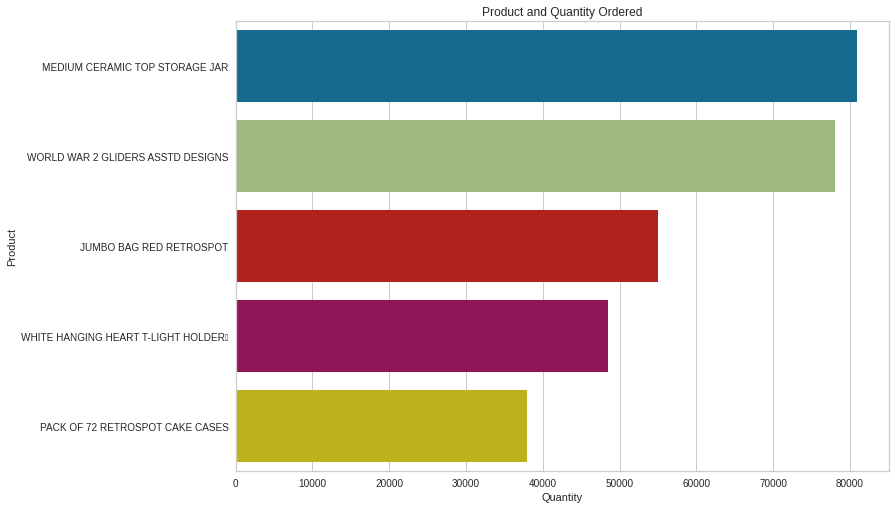

In [242]:
import seaborn as sns
from matplotlib import pyplot

product=["MEDIUM CERAMIC TOP STORAGE JAR","WORLD WAR 2 GLIDERS ASSTD DESIGNS","JUMBO BAG RED RETROSPOT","WHITE HANGING HEART T-LIGHT HOLDER	","PACK OF 72 RETROSPOT CAKE CASES"]
df_p["Product"]=product


a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.barplot(x = "Quantity",
            y = "Product",
            data = df_p)
plt.title("Product and Quantity Ordered")
plt.show()

**Most expensive items**

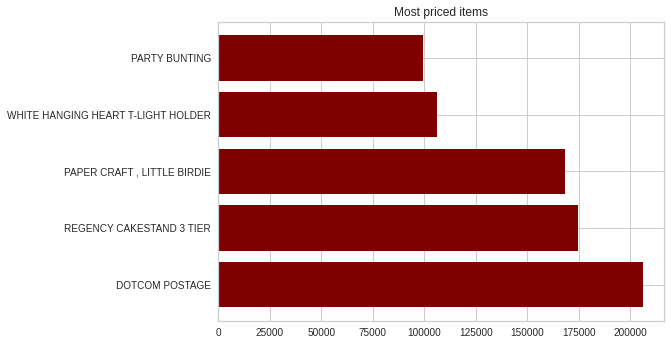

In [243]:
df_e = df
df_e["Order_value"] = df['UnitPrice']*df['Quantity']
df_e=df_e.groupby(['Description'])['Order_value'].sum().sort_values(ascending=False).head()
df_e = pd.DataFrame(df_e).reset_index()
plt.barh( df_e.Description, df_e.Order_value, color = 'maroon')
plt.title("Most priced items")
plt.show()

**Most appropriate time to display advertising to maximize the likelihood of customers buying the products?**

In [244]:
dftime = df
list_time = []
for i in dftime['InvoiceDate']:
    list_time.append(i.split(" ")[1])
dftime['Time'] = list_time
dftime.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Order_value,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30,8:26
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,8:26
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00,8:26
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,8:26
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,8:26


In [245]:
df_t=df.groupby(['Time'])['Order_value'].sum().sort_values(ascending=False).head()
df_t=pd.DataFrame(df_t).reset_index()
df_t

,Time,Order_value
0,9:15,175399.37
1,10:01,92448.34
2,15:28,56385.87
3,17:42,53853.14
4,17:55,51079.96


###### *We can use this information for targetted marketing, applying discount on products etc.*

In [246]:
import plotly.express as px
 
fig = px.pie(df_t, values="Order_value", names="Time", title='Sales distribution as per time',
              color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

## **1. User Based Collaborative Filtering**

In [247]:
# Lets see how these records with missing customer ID look
df.loc[df['CustomerID'].isna()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Order_value,Time
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom,2.51,14:32
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom,5.02,14:32
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom,3.40,14:32
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom,3.32,14:32
1447,536544,21790,VINTAGE SNAP CARDS,9,12/1/2010 14:32,1.66,NaN,United Kingdom,14.94,14:32


In [248]:
# Let's drop these records since we can't build our required matrixes 
df = df.dropna(subset=['CustomerID'])

In [249]:
# Number of records and shape before dropping our missing values
df.shape

(397884, 10)

In [250]:
# Check for null values
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Order_value    0
Time           0
dtype: int64

**Building a customer-item matrix** 

In [251]:
# We need a create a matrix that contains the customer IDs as the index, and each invidividual item as a column
# We use the pivot function to use the CustomerID as the index and use the StockCode as columns
# Then we using the Quantity value as the values we display, and finally use the aggfunc to sum up these values

customer_item_matrix = df.pivot_table(index='CustomerID', columns='StockCode', values='Quantity',aggfunc='sum')
customer_item_matrix.head()

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12347.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12348.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
12349.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
12350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [252]:
# We have quanties, but we don't actually need the exact numbers
# Let's now change all the NaNs to 0 and all values above 1 to 1

customer_item_matrix = customer_item_matrix.applymap(lambda x: 1 if x > 0 else 0)
customer_item_matrix.head()

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12349.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12350.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [253]:
customer_item_matrix.shape

(4338, 3665)

### Creating User-to-User Similarity Matrix

In [254]:
# Let's use the sklearn cosine_similarity function to compute the pairwise cosine similarities between the customers 
user_user_sim_matrix = pd.DataFrame(cosine_similarity(customer_item_matrix))
user_user_sim_matrix

,0,1,2,3,4,5,6,7,8,9,...,4328,4329,4330,4331,4332,4333,4334,4335,4336,4337
0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,1.000000,0.063022,0.046130,0.047795,0.038484,0.0,0.025876,0.136641,0.094742,...,0.0,0.029709,0.052668,0.000000,0.032844,0.062318,0.000000,0.113776,0.109364,0.012828
2,0.0,0.063022,1.000000,0.024953,0.051709,0.027756,0.0,0.027995,0.118262,0.146427,...,0.0,0.064282,0.113961,0.000000,0.000000,0.000000,0.000000,0.000000,0.170905,0.083269
3,0.0,0.046130,0.024953,1.000000,0.056773,0.137137,0.0,0.030737,0.032461,0.144692,...,0.0,0.105868,0.000000,0.000000,0.039014,0.000000,0.000000,0.067574,0.137124,0.030475
4,0.0,0.047795,0.051709,0.056773,1.000000,0.031575,0.0,0.000000,0.000000,0.033315,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.044866,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4333,0.0,0.062318,0.000000,0.000000,0.000000,0.000000,0.0,0.041523,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.105409,1.000000,0.119523,0.000000,0.000000,0.000000
4334,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.049629,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.119523,1.000000,0.000000,0.046613,0.000000
4335,0.0,0.113776,0.000000,0.067574,0.000000,0.037582,0.0,0.000000,0.160128,0.079305,...,0.0,0.174078,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.017800,0.000000
4336,0.0,0.109364,0.170905,0.137124,0.044866,0.080278,0.0,0.113354,0.034204,0.093170,...,0.0,0.037184,0.016480,0.043602,0.000000,0.000000,0.046613,0.017800,1.000000,0.096334


Notice how our column names and indexes have changed

In [255]:
# Also let's check out the shape, it should be a square matrix (i.e. same width and length)
user_user_sim_matrix.shape

(4338, 4338)

In [256]:
# Let's now re-label the columns so that it's easier to understand
# Now let's change the index from 0 to 4339 to the Customer IDs 

user_user_sim_matrix.columns = customer_item_matrix.index

user_user_sim_matrix['CustomerID'] = customer_item_matrix.index

user_user_sim_matrix = user_user_sim_matrix.set_index('CustomerID')
user_user_sim_matrix.head()

CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0,12352.0,12353.0,12354.0,12355.0,12356.0,...,18273.0,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
12347.0,0.0,1.000000,0.063022,0.046130,0.047795,0.038484,0.0,0.025876,0.136641,0.094742,...,0.0,0.029709,0.052668,0.0,0.032844,0.062318,0.0,0.113776,0.109364,0.012828
12348.0,0.0,0.063022,1.000000,0.024953,0.051709,0.027756,0.0,0.027995,0.118262,0.146427,...,0.0,0.064282,0.113961,0.0,0.000000,0.000000,0.0,0.000000,0.170905,0.083269
12349.0,0.0,0.046130,0.024953,1.000000,0.056773,0.137137,0.0,0.030737,0.032461,0.144692,...,0.0,0.105868,0.000000,0.0,0.039014,0.000000,0.0,0.067574,0.137124,0.030475
12350.0,0.0,0.047795,0.051709,0.056773,1.000000,0.031575,0.0,0.000000,0.000000,0.033315,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.044866,0.000000


##### Let's find the customers most similar to one of our test customer : '12358'

In [257]:
# Sort on the customers most similar to 12358
user_user_sim_matrix.loc[12358].sort_values(ascending=False)

CustomerID
12358.0    1.000000
18240.0    0.452911
14155.0    0.452911
14145.0    0.452911
13551.0    0.416025
             ...   
14830.0    0.000000
14834.0    0.000000
14836.0    0.000000
14840.0    0.000000
15300.0    0.000000
Name: 12358.0, Length: 4338, dtype: float64

### We will now check the items bought by custoer 12358 

In [258]:
# We use the `nonzero` function in the pandas package as it returns the integer indexes of the elements of the non-zero columns (hence the items bought).
# We convert to set data type so that we can perform comparison operations easily afterward.
# See what items were purchased by our customer '12358.0'
items_bought_by_12358 = set(customer_item_matrix.loc[12358].iloc[customer_item_matrix.loc[12358].to_numpy().nonzero()].index)
items_bought_by_12358

{'15056BL',
 '15056N',
 '15056P',
 '15060B',
 '20679',
 '21232',
 '22059',
 '22063',
 '22646',
 '37447',
 '37449',
 '48185',
 'POST'}

### Let's see what customer 14145 bought


In [259]:
items_bought_by_14145 = set(customer_item_matrix.loc[14145.0].iloc[customer_item_matrix.loc[14145.0].to_numpy().nonzero()].index)
items_bought_by_14145

{'15056BL', '15056N', '15056P', '20679', '85014A', '85014B'}

# **Recommend items to customer 14145**

In [260]:
# What items did 12358 buy, but 14145 didn't buy?
# Those would be good items to recommend to 14145 since they're so similar
items_to_recommend_to_14145 = items_bought_by_12358 - items_bought_by_14145
items_to_recommend_to_14145

{'15060B',
 '21232',
 '22059',
 '22063',
 '22646',
 '37447',
 '37449',
 '48185',
 'POST'}

In [261]:
# Let's get the descriptions of these items 
df.loc[df['StockCode'].isin(items_to_recommend_to_14145), ['StockCode', 'Description']].drop_duplicates().set_index('StockCode')

,Description
StockCode,
POST,POSTAGE
22646,CERAMIC STRAWBERRY CAKE MONEY BANK
48185,DOORMAT FAIRY CAKE
21232,STRAWBERRY CERAMIC TRINKET BOX
22059,CERAMIC STRAWBERRY DESIGN MUG
37449,CERAMIC CAKE STAND + HANGING CAKES
15060B,FAIRY CAKE DESIGN UMBRELLA
37447,CERAMIC CAKE DESIGN SPOTTED PLATE
22063,CERAMIC BOWL WITH STRAWBERRY DESIGN


#  Finding Items to recommend to a Customer 👩

In [262]:
most_similar_user = user_user_sim_matrix.loc[12358].sort_values(ascending=False).reset_index().iloc[1, 0]
most_similar_user

18240.0

In [263]:
## Creating a final function that returns the items to recommend to a customer using customer similarity 

def get_items_to_recommend_cust(cust_a):
  most_similar_user = user_user_sim_matrix.loc[cust_a].sort_values(ascending=False).reset_index().iloc[1, 0]
  items_bought_by_cust_a = set(customer_item_matrix.loc[cust_a].iloc[customer_item_matrix.loc[cust_a].to_numpy().nonzero()].index)
  items_bought_by_cust_b = set(customer_item_matrix.loc[most_similar_user].iloc[customer_item_matrix.loc[most_similar_user].to_numpy().nonzero()].index)
  items_to_recommend_to_a = items_bought_by_cust_b - items_bought_by_cust_a
  items_description = df.loc[df['StockCode'].isin(items_to_recommend_to_a), ['StockCode', 'Description']].drop_duplicates().set_index('StockCode')
  return items_description

In [264]:
get_items_to_recommend_cust(12358.0)

,Description
StockCode,
85015,SET OF 12 VINTAGE POSTCARD SET
16008,SMALL FOLDING SCISSOR(POINTED EDGE)


# **Limitation of user based collaborative filtering**


*   Right now we're returning a list of arbitrary items in no specific order

*   We need to return a list of items in order of priority (i.e. the most highly recommended item)



To make the recommendation more relevant we can look at the recommended items not just from the most similar customer, but from the top 5. Then count items, the most frequently occuring item would be the most likely to recommend.

## **2. Item Based Collaborative Filtering**

In [265]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Order_value,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30,8:26
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,8:26
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00,8:26
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,8:26
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,8:26


In [266]:
# Transposing our customer_item_matrix 
item_item_sim_matrix = pd.DataFrame(cosine_similarity(customer_item_matrix.T))
item_item_sim_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,3655,3656,3657,3658,3659,3660,3661,3662,3663,3664
0,1.000000,0.0,0.094868,0.091287,0.0,0.000000,0.090351,0.062932,0.098907,0.095346,...,0.0,0.0,0.0,0.0,0.0,0.029361,0.0,0.067591,0.0,0.078217
1,0.000000,1.0,0.000000,0.000000,0.0,0.000000,0.032774,0.045655,0.047836,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.016345,0.0,0.000000
2,0.094868,0.0,1.000000,0.115470,0.0,0.000000,0.057143,0.059702,0.041703,0.060302,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.071247,0.0,0.010993
3,0.091287,0.0,0.115470,1.000000,0.0,0.000000,0.164957,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
4,0.000000,0.0,0.000000,0.000000,1.0,0.447214,0.063888,0.044499,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000


In [267]:
item_item_sim_matrix.shape

(3665, 3665)

In [268]:
# Let's now re-label the columns so that it's easier to understand
# Now let's change the index from 0 to 3665  to the StockCode 

item_item_sim_matrix.columns = customer_item_matrix.T.index

item_item_sim_matrix['StockCode'] = customer_item_matrix.T.index
item_item_sim_matrix = item_item_sim_matrix.set_index('StockCode')
item_item_sim_matrix.head()

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
StockCode,,,,,,,,,,,,,,,,,,,,,
10002,1.000000,0.0,0.094868,0.091287,0.0,0.000000,0.090351,0.062932,0.098907,0.095346,...,0.0,0.0,0.0,0.0,0.0,0.029361,0.0,0.067591,0.0,0.078217
10080,0.000000,1.0,0.000000,0.000000,0.0,0.000000,0.032774,0.045655,0.047836,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.016345,0.0,0.000000
10120,0.094868,0.0,1.000000,0.115470,0.0,0.000000,0.057143,0.059702,0.041703,0.060302,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.071247,0.0,0.010993
10123C,0.091287,0.0,0.115470,1.000000,0.0,0.000000,0.164957,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
10124A,0.000000,0.0,0.000000,0.000000,1.0,0.447214,0.063888,0.044499,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000


In [269]:
# Most similar items to 10080

item_item_sim_matrix.loc['10080'].sort_values(ascending=False)

StockCode
10080     1.000000
23694     0.191346
22039     0.187317
47504H    0.166924
21650     0.165567
            ...   
22760     0.000000
22763     0.000000
22764     0.000000
22765     0.000000
POST      0.000000
Name: 10080, Length: 3665, dtype: float64

In [270]:
# Get the top 10 most similar items 
top_10_similar_items = list(item_item_sim_matrix.loc['10080'].sort_values(ascending=False).iloc[:10].index)
top_10_similar_items

['10080',
 '23694',
 '22039',
 '47504H',
 '21650',
 '90214F',
 '79157B',
 '90206A',
 '84012',
 '22043']

In [271]:
# Now let's create a function that returns the most similar items for an inputted item
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Order_value,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30,8:26
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,8:26
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00,8:26
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,8:26
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,8:26


In [272]:
# Get the row information for a specific item
# Note it occurs multple times, but we need just the basic info
df.loc[df['StockCode'] == '84029G']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Order_value,Time
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,8:26
61,536373,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 9:02,3.39,17850.0,United Kingdom,20.34,9:02
78,536375,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 9:32,3.39,17850.0,United Kingdom,20.34,9:32
230,536390,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,24,12/1/2010 10:19,3.39,17511.0,United Kingdom,81.36,10:19
291,536396,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 10:51,3.39,17850.0,United Kingdom,20.34,10:51
...,...,...,...,...,...,...,...,...,...,...
538103,581398,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,36,12/8/2011 13:26,3.75,17243.0,United Kingdom,135.00,13:26
538245,581403,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,4,12/8/2011 13:46,4.25,13510.0,United Kingdom,17.00,13:46
538824,581417,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,4,12/8/2011 15:01,4.25,13013.0,United Kingdom,17.00,15:01
540396,581480,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,12,12/9/2011 9:07,4.25,14441.0,United Kingdom,51.00,9:07


In [273]:
df.loc[df['StockCode'] == '84029G'][:1]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Order_value,Time
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,8:26


In [274]:
# This code checks our df for stock codes similar to those in our top_10_similar_items, we then display only the Stockcode and Description, remove duplicates
# and then set the index to StockCode
df.loc[df['StockCode'].isin(top_10_similar_items), ['StockCode', 'Description']].drop_duplicates().set_index('StockCode').loc[top_10_similar_items]

,Description
StockCode,
10080,GROOVY CACTUS INFLATABLE
23694,PAISLEY PARK CARD
22039,BOTANICAL LILY GIFT WRAP
47504H,ENGLISH ROSE SPIRIT LEVEL
21650,ASSORTED TUTTI FRUTTI BRACELET
90214F,"LETTER ""F"" BLING KEY RING"
79157B,UBO-LIGHT TRIOBASE BLUE
90206A,GOLD DIAMANTE STAR BROOCH
84012,MAGIC SHEEP WOOL GROWING FROM PAPER


In [275]:
def get_top_similar_items(item):
  top_10_similar_items = list(item_item_sim_matrix.loc[item].sort_values(ascending=False).iloc[:10].index)
  top_10 = df.loc[df['StockCode'].isin(top_10_similar_items), ['StockCode', 'Description']].drop_duplicates().set_index('StockCode').loc[top_10_similar_items]
  return top_10

In [276]:
get_top_similar_items('84029G')

,Description
StockCode,
84029G,KNITTED UNION FLAG HOT WATER BOTTLE
84029E,RED WOOLLY HOTTIE WHITE HEART.
23355,HOT WATER BOTTLE KEEP CALM
21479,WHITE SKULL HOT WATER BOTTLE
22633,HAND WARMER UNION JACK
84030E,ENGLISH ROSE HOT WATER BOTTLE
22111,SCOTTIE DOG HOT WATER BOTTLE
22112,CHOCOLATE HOT WATER BOTTLE
22114,HOT WATER BOTTLE TEA AND SYMPATHY


# **Future Scope**

###### Currently we have touched only the surface of the data but each inference generated via data exploration or recommendation can have endless possibilities. For instance:-

*   *We can use product description and time of order to generate marketing campaigns.*

*   *Most frequent words in product description can be used as keywords in search engine optimisation*

* *Order Date can be analysed to see popular days when people place an order for an item, recommendation engine can suggest items similar to the most popular items ordered hence, sales of unpopular products can increase which would lead to increase in revenue.*

* *We can also analyse buying patterns and customer behaviour.*

* *If we have more data like region, age, gender etc. then we can check ow the market/customers are segmented*

* *Factors leading to customer retention can be analysed to  improve overall sales and customer satisfaction.*

* *Reviews and Feedback from users can be used to perform sentiment analysis which can be further utlised to improve the recommendation engine. It will help the business to improve sales and services.*
